Import Data

In [2]:
import pandas as pd

data = pd.read_csv("1) iris.csv")

x = data.iloc[:,:-1]
y = data["species"]

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
print(x.shape, y.shape) 


(150, 4) (150,)


Train Random Forest Model and Make Prediction

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)



Model Evaluation

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test,y_pred)
accuracy


0.8888888888888888

Confusion Matrix

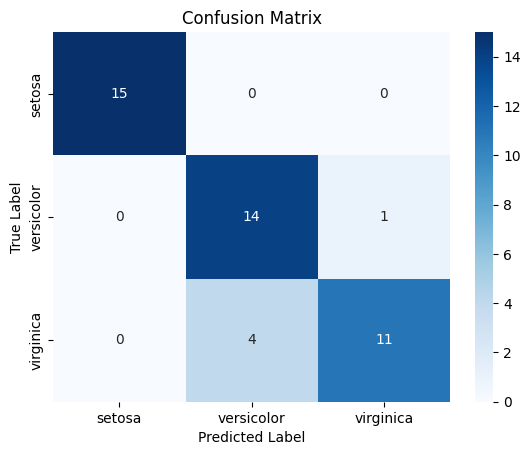

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues",xticklabels=model.classes_,yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Cross-Validation

In [12]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validation Accuracy: 0.9667 ± 0.0211


Feature Importance Analysis

C:\Users\muska\AppData\Local\Temp\ipykernel_195768\11258160.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")


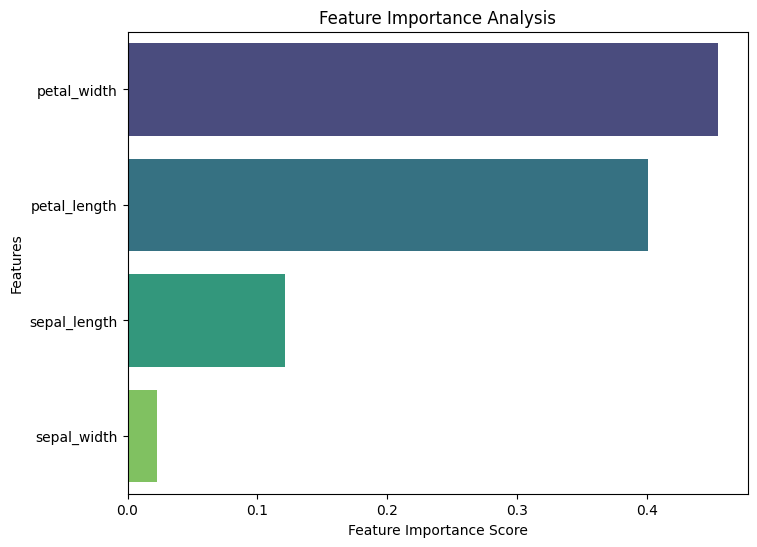

In [14]:
feature_importances = pd.DataFrame({"Feature": x.columns, "Importance": model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance Analysis")
plt.show()
